In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_excel("../../data/Novice.xlsx")
df.head()

,Match ID 18Char,Stage,Little ID,Big ID,Big County,Big Age,Big Occupation,Big: Military,Big Approved Date,Big Level of Education,...,Little Contact: Interest Finder - Career,Little Contact: Interest Finder - Personality,Little Contact: Interest Finder - Three Wishes,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Little Mailing Address Census Block Group,Big Home Census Block Group,Big Employer/School Census Block Group,Match Length
0,a1v2J0000028pRvQAI,Closed,0032J00003PLe29QAD,0032J00003PhDOI,Hennepin,40,Unemployed,NaN,NaT,Masters Degree,...,NaN,NaN,NaN,Female,Black or African American,2004-01-01,2.705303e+11,2.705302e+11,NaN,9.0
1,a1v2J000002uR0JQAU,Closed,0032J00003PfZ6OQAV,0032J00003PgoV1,Washington,65,Tech: Research/Design,NaN,2018-04-11,NaN,...,NaN,NaN,NaN,Female,Black or African American; White or Caucasian,2006-06-01,2.716307e+11,2.716307e+11,NaN,46.1
2,a1v2J0000027NsOQAU,Closed,0032J00003PLeoRQAT,0032J00003Ph0MT,Ramsey,45,Military,NaN,NaT,Bachelors Degree,...,NaN,NaN,NaN,Male,Black or African American; White or Caucasian,2007-01-01,2.700305e+11,2.712304e+11,NaN,6.2
3,a1v2J0000027dtOQAQ,Active,0032J00003PLeoRQAT,0032J00003Ph14N,Hennepin,61,Finance: Banking,NaN,2018-01-02,NaN,...,NaN,NaN,NaN,Male,Black or African American; White or Caucasian,2007-01-01,2.700305e+11,NaN,NaN,85.6
4,a1v2J0000028enKQAQ,Closed,0032J00003PfZ6QQAV,0032J00003Ph14j,Ramsey,29,Human Services: Non-Profit,NaN,2018-03-12,Bachelors Degree,...,NaN,NaN,NaN,Female,Hispanic,2005-01-01,2.716307e+11,2.705311e+11,NaN,28.3


In [20]:
df['Little Mailing Address Census Block Group'].value_counts()

Little Mailing Address Census Block Group
2.705300e+11    19
2.705310e+11    16
2.705310e+11    14
2.705300e+11    14
2.705310e+11    13
                ..
2.700305e+11     1
2.705303e+11     1
2.712304e+11     1
2.705310e+11     1
2.700305e+11     1
Name: count, Length: 959, dtype: int64

In [4]:
df.isnull().sum()

Match ID 18Char                                 0
Stage                                           0
Little ID                                       0
Big ID                                          0
Big County                                    655
                                             ... 
Little Birthdate                                0
Little Mailing Address Census Block Group     966
Big Home Census Block Group                  1005
Big Employer/School Census Block Group       3158
Match Length                                    0
Length: 66, dtype: int64

In [5]:
# columns to be modified


# todo: remove all "contact" and use _

to_be_deleted = [
    "Big Employer/School Census Block Group", "Big Enrollment: Created Date", "Big Acceptance Date",
    "Big Contact: Created Date","Big Days Acceptance to Match", "Big Days Interview to Acceptance","Big Days Interview to Match",
    "Big Contact: Preferred Communication Type", "Big Assessment Uploaded", "Big Enrollment: Created Date",
    "Big Employer", "Big Employer/School Census Block Group", "Big Approved Date", "Big Home Census Block Group",

    "Big ID", "Little ID", "Stage", "Closure Reason", "Closure Details", "Match Closure Meeting Date", "Big Assessment Uploaded", 
    "Little Mailing Address Census Block Group", "Little Interview Date", "Little Acceptance Date", "Little Application Received", "Little Moved to RTBM in MF",
    "Little RTBM Date in MF", "Little RTBM in Matchforce", "Little Moved to RTBM in MF", "Little Interview Date", "Little Acceptance Date", "Little RTBM in Matchforce",

]

yes_no = [
    "Big Open to Cross-Gender Match", "Big Re-Enroll", "Big Contact: Marital Status", "Big Gender", "Big Military", "Big Car Access",
    "Big Contact: Former Big/Little", 
] 

In [6]:
df.drop(to_be_deleted, axis=1, inplace=True)
df.isna().sum()

Match ID 18Char                                         0
Big County                                            655
Big Age                                                 0
Big Occupation                                        325
Big: Military                                        2044
Big Level of Education                               2825
Big Languages                                        1512
Big Gender                                              1
Big Birthdate                                           0
Program                                                 0
Program Type                                            0
Big Race/Ethnicity                                     33
Match Activation Date                                   0
Rationale for Match                                   299
Big Enrollment: Record Type                          1902
Big Car Access                                       3158
Big Open to Cross-Gender Match                       3238
Big Re-Enroll 

In [7]:
# drop column where number of na > 300
to_drop = [x for x in df.columns.to_list() if df[x].isna().sum()>325]
df.drop(to_drop, axis=1, inplace=True)
df

,Match ID 18Char,Big Age,Big Occupation,Big Gender,Big Birthdate,Program,Program Type,Big Race/Ethnicity,Match Activation Date,Rationale for Match,Little Gender,Little Participant: Race/Ethnicity,Little Birthdate,Match Length
0,a1v2J0000028pRvQAI,40,Unemployed,Female,1985-02-01,General Community,Community,Black or African American;White or Caucasian;,2017-03-03,NaN,Female,Black or African American,2004-01-01,9.0
1,a1v2J000002uR0JQAU,65,Tech: Research/Design,Female,1959-05-01,General Community,Community,White or Caucasian;,2018-04-12,Their shared interests include spending time o...,Female,Black or African American; White or Caucasian,2006-06-01,46.1
2,a1v2J0000027NsOQAU,45,Military,Male,1979-07-01,General Community,Community,Asian;,2017-03-23,NaN,Male,Black or African American; White or Caucasian,2007-01-01,6.2
3,a1v2J0000027dtOQAQ,61,Finance: Banking,Male,1963-11-01,General Community,Community,White or Caucasian;,2018-01-11,B_first_name and L_first_name were matched bec...,Male,Black or African American; White or Caucasian,2007-01-01,85.6
4,a1v2J0000028enKQAQ,29,Human Services: Non-Profit,Female,1996-01-01,General Community,Community,White or Caucasian;,2018-04-13,Shared interests like being creative and tryin...,Female,Hispanic,2005-01-01,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,a1vUX000001JxTeYAK,30,Education,Female,1994-05-01,General Site,Site,Black or African American;,2024-11-13,"-BS and LS are both Black/African-American, BS...",Female,Black or African American,2017-01-01,3.5
3271,a1vUX000001SmU9YAK,21,Student: College,Female,2003-03-01,General Site,Site,Black or African American;,2024-12-16,- B_first_name (BS) and L_first_name (LS) are ...,Female,White or Caucasian,2014-10-01,2.4
3272,a1vUX000001SmPJYA0,21,Student: College,Female,2003-03-01,General Site,Site,Black or African American;,2024-12-16,- B_first_name (BS) and L_first_name (LS) are ...,Female,Asian - Vietnamese; White or Caucasian,2015-02-01,2.4
3273,a1vUX000001PyJlYAK,33,Consultant,Male,1991-07-01,General Site,Site,White or Caucasian;,2024-11-21,B_first_name (BB) and L_first_name (LB) are a ...,Male,Black or African American,2014-09-01,3.2


In [8]:
df.dtypes

Match ID 18Char                               object
Big Age                                        int64
Big Occupation                                object
Big Gender                                    object
Big Birthdate                         datetime64[ns]
Program                                       object
Program Type                                  object
Big Race/Ethnicity                            object
Match Activation Date                 datetime64[ns]
Rationale for Match                           object
Little Gender                                 object
Little Participant: Race/Ethnicity            object
Little Birthdate                      datetime64[ns]
Match Length                                 float64
dtype: object

In [9]:
df["big_age_match_start"] = abs(df['Big Birthdate'].dt.year - df["Match Activation Date"].dt.year)
df["little_age_match_start"] = abs(df['Little Birthdate'].dt.year - df["Match Activation Date"].dt.year)
df['big_age_match_start']

0       32
1       59
2       38
3       55
4       22
        ..
3270    30
3271    21
3272    21
3273    33
3274    22
Name: big_age_match_start, Length: 3275, dtype: int32

<Axes: xlabel='little_age_match_start', ylabel='Match Length'>

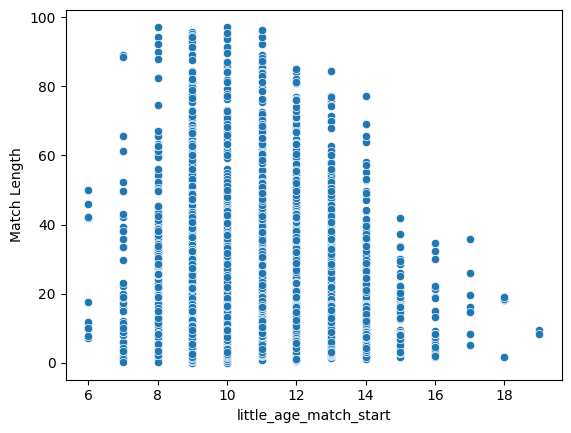

In [10]:
sns.scatterplot(x=df['little_age_match_start'], y=df["Match Length"])

In [11]:
df["same_gender"] = df['Little Gender']==df['Big Gender']
df["same_gender"].value_counts()

same_gender
True     3074
False     201
Name: count, dtype: int64

<Axes: xlabel='same_gender', ylabel='Match Length'>

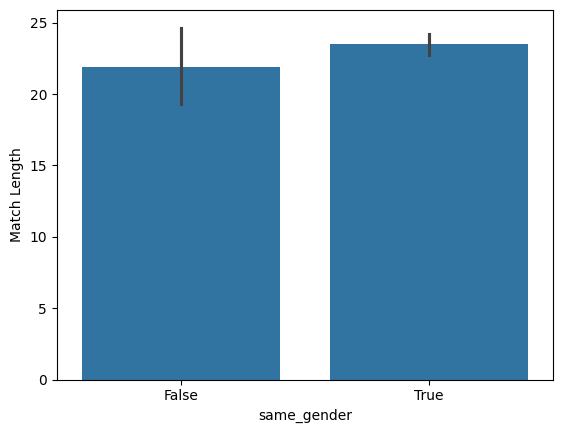

In [12]:
sns.barplot(x=df['same_gender'], y=df['Match Length'] )

In [13]:
df['little_gender'] = df['Little Gender'].apply(lambda x: x if x in ['Female', 'Male'] else "Non-binary")
df['little_gender'].value_counts()

little_gender
Female        1796
Male          1464
Non-binary      15
Name: count, dtype: int64

<Axes: xlabel='little_gender', ylabel='Match Length'>

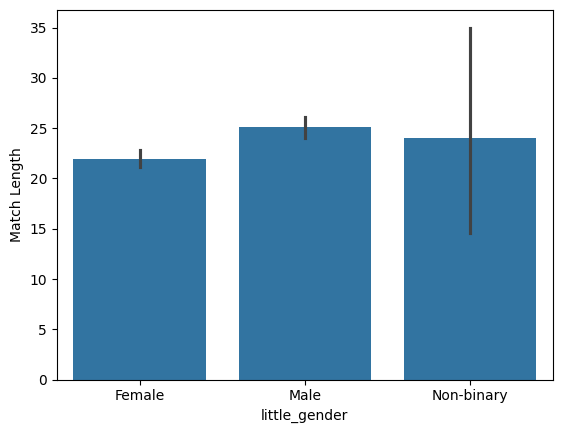

In [14]:
sns.barplot(x=df['little_gender'], y=df['Match Length'] )

<Axes: xlabel='Program Type', ylabel='Match Length'>

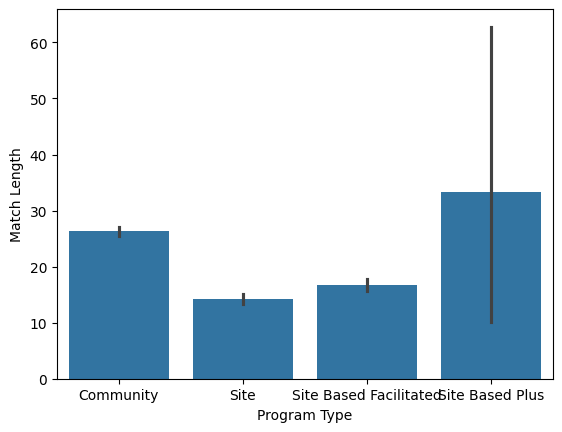

In [15]:
sns.barplot(x=df['Program Type'], y=df['Match Length'] )

In [16]:
# classify these type of occupstion into time consuming ones anf check if that affect match length.
df['Big Occupation'].unique()

array(['Unemployed', 'Tech: Research/Design', 'Military',
       'Finance: Banking', 'Human Services: Non-Profit',
       'Business: Human Resources', 'Unknown', 'Retail: Mgt',
       'Finance: Accountant', 'Medical: Healthcare Worker',
       'Tech: Computer/Programmer', 'Construction', 'Business: Marketing',
       'Business: Clerical', 'Self-Employed, Entrepreneur',
       'Business: Mgt, Admin', 'Medical', 'Govt', 'Medical: Nurse',
       'Govt: Mgmt/Admin', 'Arts, Entertainment, Sports', 'Finance',
       'Service: Restaurant', 'Customer Service', 'Forestry',
       'Law: Lawyer', 'Architect', nan, 'Business',
       'Human Services: Social Worker', 'Consultant', 'Human Services',
       'Medical: Doctor, Provider', 'Business: Sales', 'Student: College',
       'Medical: Admin', 'Business: Engineer', 'Education: Admin',
       'Education: Teacher', 'Facilities/Maintenance',
       'Tech: Sales, Mktg', 'Retired', 'Agriculture', 'Law',
       'Tech: Engineer', 'Transport: Flight Att

In [17]:
df['Big Race/Ethnicity'].value_counts()

Big Race/Ethnicity
White or Caucasian;                                             2486
Black or African American;                                       203
Asian;                                                           170
Other;                                                           142
Asian - Other;                                                    97
Hispanic - Other Latinx or Spanish origin;                        55
Hispanic;                                                         31
Black or African American;White or Caucasian;                     18
Prefer not to say;                                                12
American Indian or Alaska Native;                                  5
Asian;White or Caucasian;                                          4
Asian;Hispanic;                                                    3
Asian - Chinese;                                                   3
Pacific Islander - Native Hawaiian;Pacific Islander - Other;       3
Asian - Indian;

In [ ]:
df['']